## **<span style="color:red">통계 분석 기법을 이용한 가설 검정</span>** ## 
***
- 통계 분석은 기술 통계와 추론 통계로 나눌 수 있음
  - 기술 통계: 데이터를 요약해 설명하는 통계
  - 추론 통계: 단순히 숫자를 요약하는 것을 넘어 어떤 값이 발생할 확률을 계산하는 통계 
  
<br/> 

- 유의확률: 실제로는 집단 간 차이가 없는데 우연히 차이가 있는 데이터가 추출될 확률(유의확률이 클 수록 집단 간 차이가 유의하지 않음) 
  - 일반적으로 0.05보다 작으면 유의하다고 봄
  
<br/>  

- 통계적 가설 검정: 유의확률을 이용해 가설을 검정하는 방법

#### **t 검정 -  두 집단의 평균 비교하기** ####
- scipy 패키지 활용

In [1]:
import pandas as pd
mpg=pd.read_csv("mpg.csv")

# 기술 통계 분석
mpg.query('category in ["compact","suv"]')\
    .groupby('category',as_index=False)\
    .agg(n=('category',"count"),
        mean=('cty','mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [2]:
compact=mpg.query('category=="compact"')["cty"]
suv=mpg.query('category=="suv"')["cty"]

In [3]:
from scipy import stats
stats.ttest_ind(compact,suv,equal_var=True) # equal_var=True 는 집단 간 분산이 같다고 가정하는 것

Ttest_indResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21)

#### **상관분석 - 두 변수의 관계 분석하기** ####
- df.corr() 활용
- scipy 패키지 활용
- 여러 변수의 관련성을 한꺼번에 알아보고 싶을 때 모든 변수의 상관관계를 나타낸 것

In [4]:
economics=pd.read_csv("economics.csv")

economics[["unemploy","pce"]].corr() # 유의 확률은 알 수 없음

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [5]:
stats.pearsonr(economics["unemploy"],economics["pce"])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289862e-61)

In [6]:
# 상관행렬 히트맵 만들기
mtcars=pd.read_csv("mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
car_cor=mtcars.corr() # 상관행렬 만들기
car_cor=round(car_cor,2)
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.dpi":'120', # 해상도 설정
                     'figure.figsize':[7.5,5.5]}) # 가로 세로 크기 설정

<Axes: >

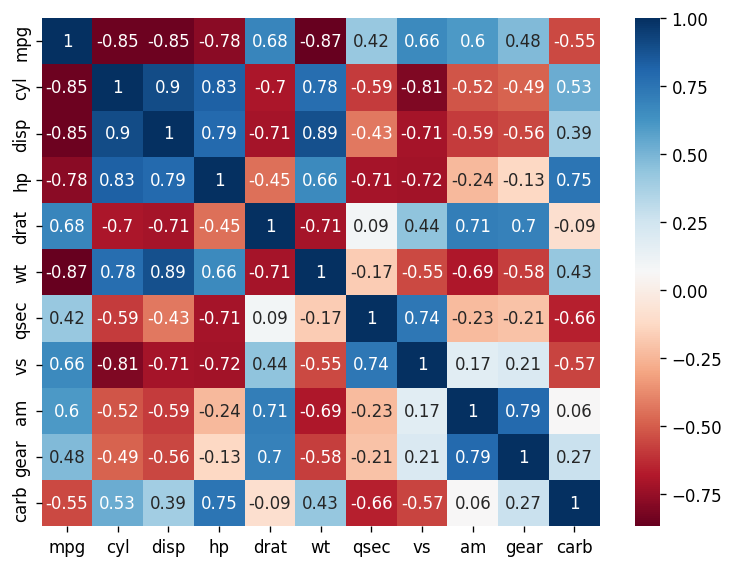

In [9]:
import seaborn as sns
sns.heatmap(car_cor, annot= True, # 상관계수 표시
           cmap="RdBu") # 컬러맵

In [10]:
# 대각 행렬 제거하기

# mask 만들기
import numpy as np
mask=np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)]=1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

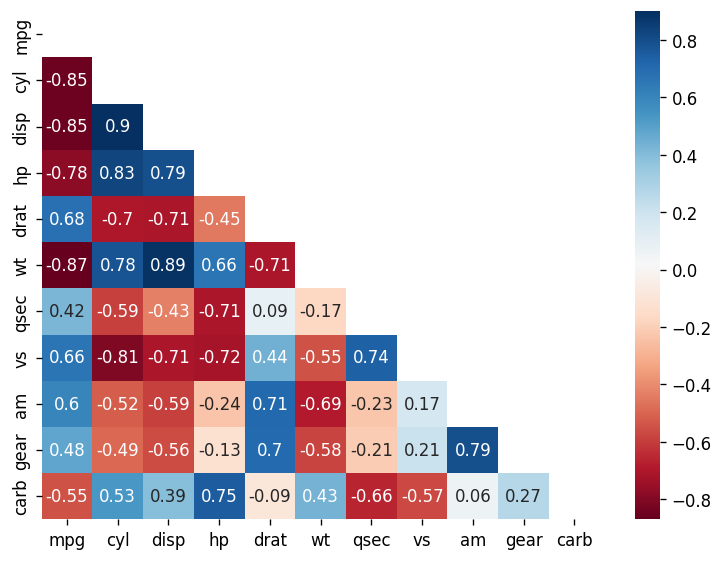

In [12]:
# 히트맵에 mask 적용하기
sns.heatmap(data=car_cor,
           annot=True,
           cmap="RdBu",
           mask=mask)
# 히트맵의 빈 행과 열이 존재

<Axes: >

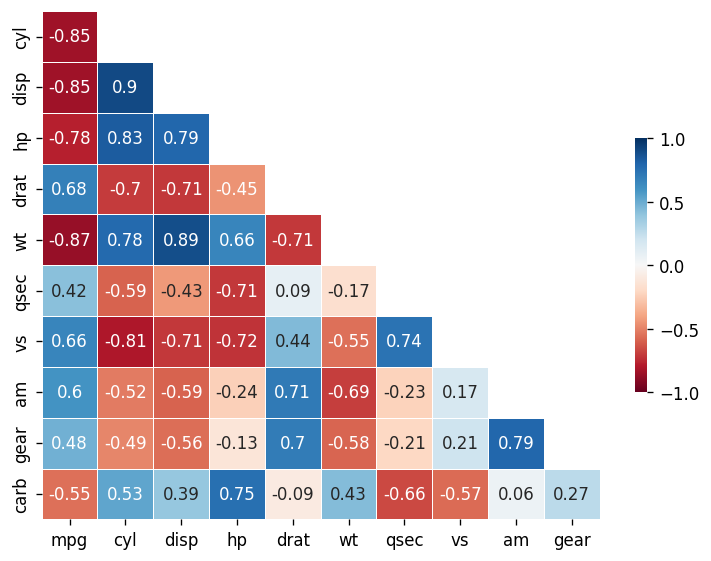

In [13]:
mask_new=mask[1:,:-1] # mask 첫번째 행, 마지막 열 제거
cor_new=car_cor.iloc[1:,:-1] # 상관행렬 첫 번째 행, 마지막 열 제거

# 히트맵 만들기
sns.heatmap(data=cor_new,
           annot=True,
           cmap="RdBu",
           mask=mask_new,
           linewidths=.5, # 경계 구분선 추가
           vmax=1, # 가장 진한 파란색으로 표현할 최대갑스
           vmin=-1, # 가장 진한 빨간색으로 표현할 최소값,
           cbar_kws={"shrink":.5}) # 범례크기 줄이기

## **<span style="color:red">머신러닝을 이용한 예측 분석</span>** ## 
***
- 머신러닝: 함수와 비슷하지만, 함수를 만들 때는 계산 규칙을 정해 입력하는 것과 다리 머신러닝 모델은 규칙을 정하지 않아도 됨
- 예측 변수: 예측하는 데 활용하는 변수, 또는 모델에 입력하는 값
- 타겟 변수: 예측하고자 하는 변수, 또는 모델이 출력하는 값
- 머신러닝 모델은 미래의 값을 예측하는 용도로 자주 사용됨

#### **의사 결정 나무 모델** ####
- 주어진 질문에 yes/no로 답하면 마지막에 결론을 얻는 구조로 되어 있음
- 발병/정상처럼 둘 중 한 가지 값으로 분류하는 모델을 이진 분류 모델이라고 하며, 셋 이상의 값으로 분류하는 모델을 다중 분류 모델이라 함

1. 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기 

2. 첫번째 질문의 답변에 따라 데이터를 두 노드로 분할하기  
-노드: 질문의 답변이 같아서 함께 분류된 집단

3. 각 노드에서 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기

4. 노드가 완벽하게 분리될 때까지 반복하기

 -의사 결정 나무 모델의 특징
- 노드마다 분할 횟수가 다르다
- 노드마다 선택되는 예측 변수가 다르다
- 어떤 예측 변수는 모델에서 탈락한다

#### **소득 예측 모델 만들기** ####

In [14]:
import pandas as pd
df=pd.read_csv("adult.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
# 타겟 변수 전처리
df["income"].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [16]:
import numpy as np
df["income"]=np.where(df["income"]==">50K", "high","low")
df["income"].value_counts(normalize=True)

low     0.760718
high    0.239282
Name: income, dtype: float64

In [17]:
# 불필요한 변수 제거
df=df.drop(columns="fnlwgt")

In [18]:
# 문자 타입 변수를 숫자 타입으로 바꾸기

# 원핫 인코딩 : 특정 값이면 1, 그렇지 않으면 0으로 설정
df_tmp=df[["sex"]]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [19]:
df_tmp.value_counts()

sex   
Male      32650
Female    16192
dtype: int64

In [20]:
df_tmp=pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [21]:
df_tmp[["sex_Female","sex_Male"]].head()

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [22]:
target=df["income"]

df=df.drop(columns="income")
df=pd.get_dummies(df) # 문자 타입 변수 원핫 인코딩

df["income"]=target
df.info() # 변수가 100개를 초과해서 변수 정보가 안나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [23]:
import numpy as np
df.info(max_cols=np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  uint8 
 6    workclass_Federal-gov                      48842 non-null  uint8 
 7    workclass_Local-gov                        48842 non-null  uint8 
 8    workclass_Never-worked                     48842 non-null  uint8 
 9    workclass_Private                          48842 non-null  uint8 
 10   workclass_Self-emp-i

- 모든 데이터를 사용해 모델을 만들면 성능 평가 점수를 신뢰할 수 없음  
->모델의 성능이 좋아서인지 아니면 이미 경험한 데이터라 잘 맞춘 것인지 알 수 없기 때문
- 크로스 밸리데이션: 신뢰할 수 있는 성능 평가 점수를 얻는 방법  
->가지고 있는 데이터에서 일부만 추출해 모델을 만들 때 사용하고, 나머지는 남겨 두었다가 성능을 평가할 때 사용  
->분할한 데이터 중에서 모델을 만들 때 사용하는 데이터를 트레이닝 세트, 성능을 평가할 때 사용하는 데이터를 테스트 세트라고 함

In [24]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df, 
                                   test_size=0.3, # 테스트 세트 비율
                                   stratify=df["income"], # 타겟 변수 비율 유지
                                   random_state=1234) # 난수 고정

In [25]:
# train
df_train.shape

(34189, 108)

In [26]:
# test
df_test.shape

(14653, 108)

In [27]:
# train
df_train["income"].value_counts(normalize=True)

low     0.760713
high    0.239287
Name: income, dtype: float64

In [28]:
# test
df_test["income"].value_counts(normalize=True)

low     0.760732
high    0.239268
Name: income, dtype: float64

In [29]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=1234, # 난수 고정
                               max_depth=3) # 나무 깊이: 노드를 최재 몇 번까지 분할할지 정함

In [30]:
# 모델 만들기
train_x=df_train.drop(columns="income") # 예측 변수 추출
train_y=df_train["income"] # 타겟 변수 추출
model=clf.fit(X=train_x,y=train_y)

[Text(0.5, 0.875, 'x[32] <= 0.5\ngini = 0.364\nsamples = 34189\nvalue = [8181, 26008]'),
 Text(0.25, 0.625, 'x[2] <= 7073.5\ngini = 0.12\nsamples = 18525\nvalue = [1187, 17338]'),
 Text(0.125, 0.375, 'x[1] <= 13.5\ngini = 0.092\nsamples = 18210\nvalue = [885, 17325]'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 17204\nvalue = [637, 16567]'),
 Text(0.1875, 0.125, 'gini = 0.371\nsamples = 1006\nvalue = [248, 758]'),
 Text(0.375, 0.375, 'x[0] <= 20.0\ngini = 0.079\nsamples = 315\nvalue = [302, 13]'),
 Text(0.3125, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4375, 0.125, 'gini = 0.056\nsamples = 310\nvalue = [301, 9]'),
 Text(0.75, 0.625, 'x[1] <= 12.5\ngini = 0.494\nsamples = 15664\nvalue = [6994, 8670]'),
 Text(0.625, 0.375, 'x[2] <= 5095.5\ngini = 0.442\nsamples = 11002\nvalue = [3634, 7368]'),
 Text(0.5625, 0.125, 'gini = 0.418\nsamples = 10472\nvalue = [3115, 7357]'),
 Text(0.6875, 0.125, 'gini = 0.041\nsamples = 530\nvalue = [519, 11]'),
 Text(0.875, 0.375, 'x[2] <

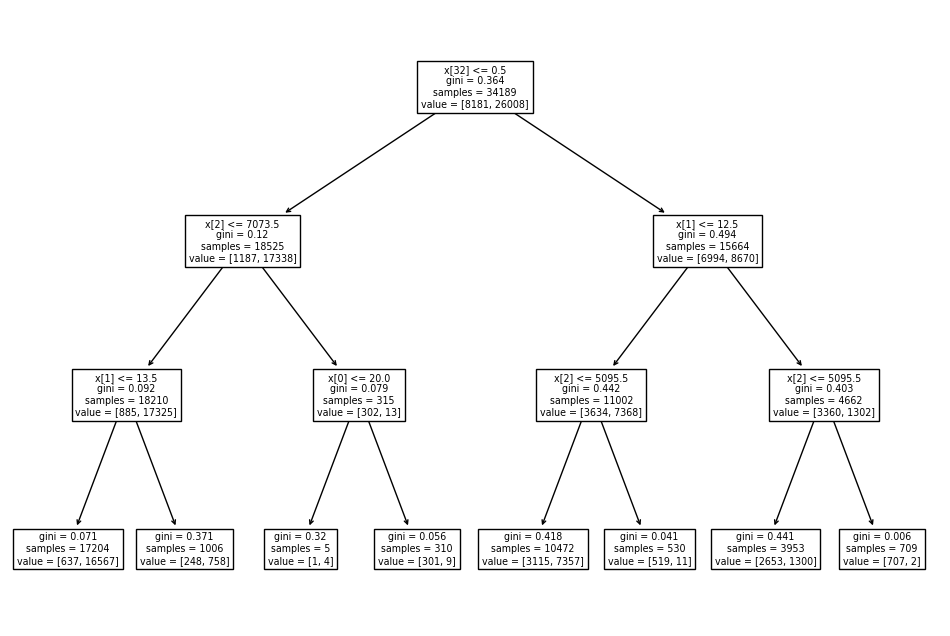

In [31]:
# 모델 구조 살펴보기
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.dpi":"100", # 해상도 설정
                    "figure.figsize":[12,8]}) # 그래프 크기 설정

tree.plot_tree(model)

[Text(0.5, 0.875, 'marital_status_Married-civ-spouse <= 0.5\nsamples = 100.0%\nvalue = [0.239, 0.761]\nclass = low'),
 Text(0.25, 0.625, 'capital_gain <= 7073.5\n54.2%\n[0.064, 0.936]\nlow'),
 Text(0.125, 0.375, 'education_num <= 13.5\n53.3%\n[0.049, 0.951]\nlow'),
 Text(0.0625, 0.125, '50.3%\n[0.037, 0.963]\nlow'),
 Text(0.1875, 0.125, '2.9%\n[0.247, 0.753]\nlow'),
 Text(0.375, 0.375, 'age <= 20.0\n0.9%\n[0.959, 0.041]\nhigh'),
 Text(0.3125, 0.125, '0.0%\n[0.2, 0.8]\nlow'),
 Text(0.4375, 0.125, '0.9%\n[0.971, 0.029]\nhigh'),
 Text(0.75, 0.625, 'education_num <= 12.5\n45.8%\n[0.447, 0.553]\nlow'),
 Text(0.625, 0.375, 'capital_gain <= 5095.5\n32.2%\n[0.33, 0.67]\nlow'),
 Text(0.5625, 0.125, '30.6%\n[0.297, 0.703]\nlow'),
 Text(0.6875, 0.125, '1.6%\n[0.979, 0.021]\nhigh'),
 Text(0.875, 0.375, 'capital_gain <= 5095.5\n13.6%\n[0.721, 0.279]\nhigh'),
 Text(0.8125, 0.125, '11.6%\n[0.671, 0.329]\nhigh'),
 Text(0.9375, 0.125, '2.1%\n[0.997, 0.003]\nhigh')]

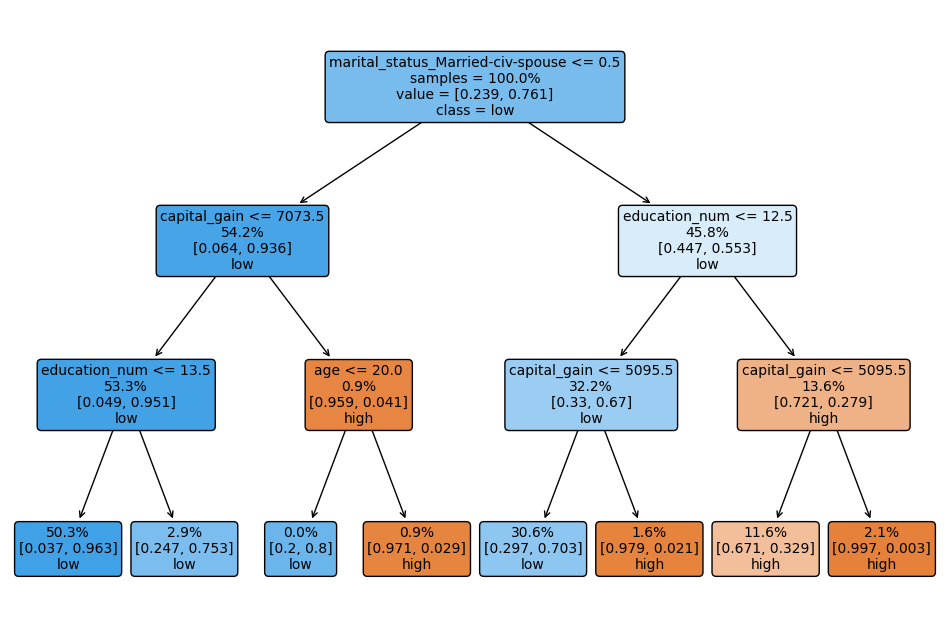

In [32]:
# 그래프를 보기 좋게 수정
tree.plot_tree(model,
              feature_names= train_x.columns, # 예측 변수명
              class_names=["high","low"], # 타겟 변수 클래스, 알파벳 순
              proportion=True, # 비율 표기
              filled=True, # 색칠
              rounded=True, # 둥근 테두리
              impurity=False, # 불순도 표시, purity는 한 클래스의 비율이 우세한 정도를 뜻함
              label="root", # label 표시 위치
              fontsize=10) # 글자 크기

In [33]:
# 모델을 이용해 예측하기
test_x=df_test.drop(columns="income") # 예측 변수 추출
test_y=df_test["income"] # 타겟 변수 추출

# 예측값 구하기
df_test["pred"]=model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
48445,35,13,10520,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,high
19639,41,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,low
21606,29,4,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low


In [34]:
# 성능 평가하기

# confusion matrix: 모델이 예측한 값 중 맞은 경우와 틀린 경우의 빈도를 나타낸 것

from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_true=df_test["income"], # 실제값
                         y_pred=df_test["pred"], # 예측값
                         labels=["high","low"]) # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]], dtype=int64)

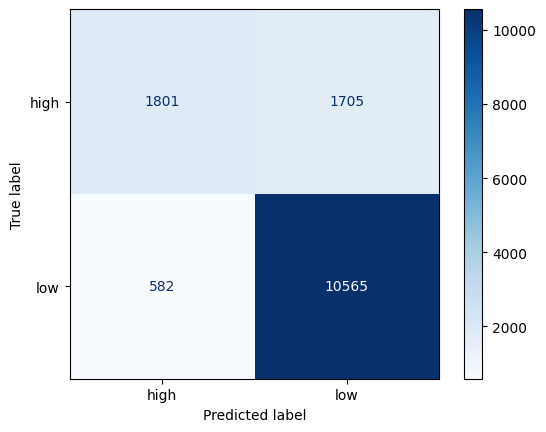

In [35]:
plt.rcParams.update(plt.rcParamsDefault) # 그래프 설정 되돌리기
from sklearn.metrics import ConfusionMatrixDisplay
p=ConfusionMatrixDisplay(confusion_matrix=conf_mat, 
                        display_labels=("high","low")) # 타겟 변수 클래스명

p.plot(cmap="Blues") # 컬러맵 적용해 출력
plt.show() # 행이 실제 빈도를 의미함, 행렬 순서대로 각각 TP, FN, FP, TN으로 이야기함

- 정확도(Accuracy): 예측해서 맞춘 비율  
Accuracy = (TP+ TN)/(TP + TN + FP + FN)   

- accuracy는 타겟 변수의 클래스별 비율이 불균형하면 신뢰하기 어려움

In [36]:
# 정확도 측정
import sklearn.metrics as metrix
metrix.accuracy_score(y_true=df_test["income"], # 실제값
                     y_pred=df_test["pred"]) # 예측값

0.8439227461953184

- 정밀도(Precision): 모델이 관심 클래스를 예측해서 맞춘 비율  
Precision = TP/(TP + FP)

In [37]:
# 정밀도 측정
metrix.precision_score(y_true=df_test["income"], # 실제값
                      y_pred=df_test["pred"], # 예측값
                      pos_label="high") # 관심 클래스

0.7557700377675199

- 재현율(Recall): 모델이 실제 데이터에서 관심 클래스를 찾아낸 비율, 민감도(sensitivity)로 표현하기도 함  
Recall = TP/(TP+FN)

In [38]:
# 재현율 측정
metrix.recall_score(y_true=df_test["income"], # 실제값
                      y_pred=df_test["pred"], # 예측값
                      pos_label="high") # 관심 클래스

0.5136908157444381

- F1 score: recall과 precision이 모두 중요할 때, 둘의 크기를 함께 반영한 것, 조화평균으로 구하며 성능이 높을수록 1에 가까워짐.  
F-score 또는 F-measure로도 표시함, accuracy와 달리 타겟 변수의 클래스가 불균형해도 모델의 성능을 잘 표현함

In [39]:
# F1 score 측정
metrix.f1_score(y_true=df_test["income"], # 실제값
                      y_pred=df_test["pred"], # 예측값
                      pos_label="high") # 관심 클래스

0.6116488368143997

#### **어떤 성능 평가 지표를 사용해야 할까?** ####
- precision: 관심 클래스가 분명할 때, 관심 클래스로 예측해서 틀릴 때 손실이 클 때. (ex) 고소득자를 예측해 고가의 제품을 홍보
- recall: 관심 클래스를 최대한 많이 찾아내야 할 때, 관심 클래스를 놓칠 때 손실이 클 때. (ex) 전염병에 감염된 사람을 찾아냄
- F1 socre: recall과 precision이 모두 중요할 때, 한 가지 지표로 성능을 비교할 때